# **0.0 - Importar Bibliotecas**

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import ElasticNet

In [2]:
warnings.filterwarnings("ignore")


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mt.mean_squared_error(y_true, y_pred))

# **1.0 - Baixar Datasets**

In [3]:
# Train Dataset
X_train = pd.read_csv("/content/X_training.csv")
y_train = pd.read_csv("/content/y_training.csv")

# Validation Dataset
X_val = pd.read_csv("/content/X_validation.csv")
y_val = pd.read_csv("/content/y_validation.csv")

# Test Dataset
X_test = pd.read_csv("/content/X_test.csv")
y_test = pd.read_csv("/content/y_test.csv")

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# **2.0 - Performance do Dataset de Treino**

In [5]:
# Train and Fit Model
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)

# Predict
y_pred_train = elastic_net.predict(X_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.00019046781275633418
Train MSE: 0.2455176660417108
Train RMSE: 0.49549739256802433
Train MAE: 0.4910355141785986
Train MAPE: 1105713679340208.8


# **3.0 - Performance do Dataset de Validação**

In [6]:
# Define Model
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)

# Predict
y_pred_val = elastic_net.predict(X_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.00017938279373652666
Validation MSE: 0.24551765308833753
Validation RMSE: 0.495497379496943
Validation MAE: 0.49104831921743713
Validation MAPE: 1106002192527781.8


# **4.0 - Ajuste fino de hiperparâmetros**

In [7]:
l1_ratio = np.arange(0.0, 1.0, 0.05)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in l1_ratio:
    # Define Model
    elastic_net = ElasticNet(random_state=42, l1_ratio=i)
    elastic_net.fit(X_train, y_train)

    # Predict
    y_pred = elastic_net.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

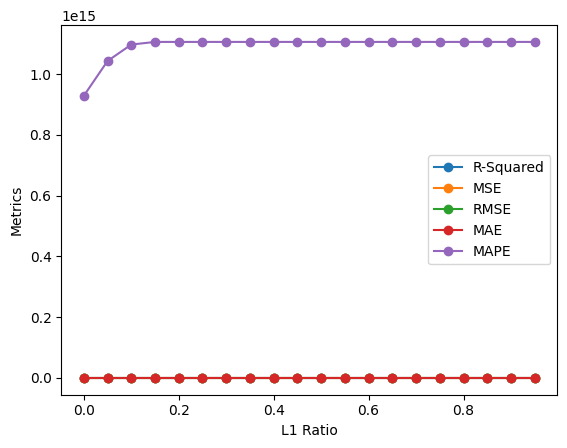

In [9]:
plt.plot(l1_ratio, r2_list, marker="o", label="R-Squared")
plt.plot(l1_ratio, mse_list, marker="o", label="MSE")
plt.plot(l1_ratio, rmse_list, marker="o", label="RMSE")
plt.plot(l1_ratio, mae_list, marker="o", label="MAE")
plt.plot(l1_ratio, mape_list, marker="o", label="MAPE")
plt.xlabel("L1 Ratio")
plt.ylabel("Metrics")
plt.legend()

In [10]:
best_l1 = l1_ratio[np.argmin(rmse_list)]
best_l1

0.0

In [11]:
l1_ratio

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [12]:
max_iter = np.arange(100, 3100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [13]:
for i in max_iter:
    # Define Model
    elastic_net = ElasticNet(random_state=42, l1_ratio=best_l1, max_iter=i)
    elastic_net.fit(X_train, y_train)

    # Predict
    y_pred = elastic_net.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

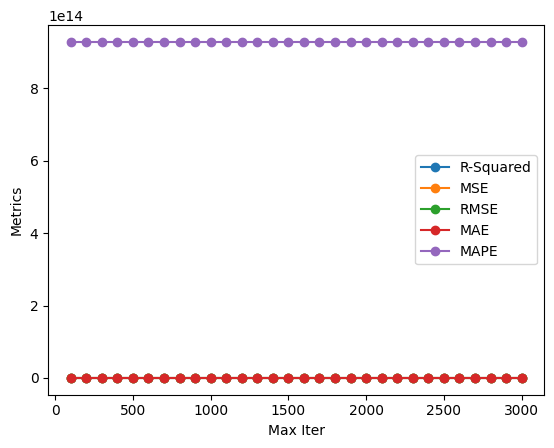

In [14]:
plt.plot(max_iter, r2_list, marker="o", label="R-Squared")
plt.plot(max_iter, mse_list, marker="o", label="MSE")
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.plot(max_iter, mae_list, marker="o", label="MAE")
plt.plot(max_iter, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [15]:
best_iter = max_iter[np.argmin(rmse_list)]
best_iter

200

In [16]:
alpha = np.arange(0, 10, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [17]:
for i in alpha:
    # Define Model
    elastic_net = ElasticNet(
        random_state=42, l1_ratio=best_l1, max_iter=best_iter, alpha=i
    )
    elastic_net.fit(X_train, y_train)

    # Predict
    y_pred = elastic_net.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

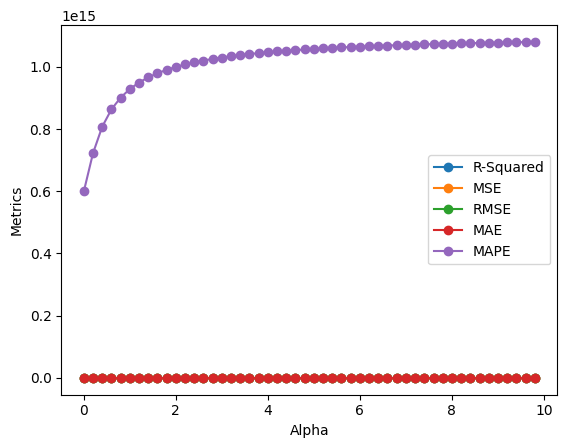

In [18]:
plt.plot(alpha, r2_list, marker="o", label="R-Squared")
plt.plot(alpha, mse_list, marker="o", label="MSE")
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.plot(alpha, mae_list, marker="o", label="MAE")
plt.plot(alpha, mape_list, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [19]:
best_alpha = alpha[np.argmin(rmse_list)]
best_alpha

0.0

# **Performance do Dataset de Teste**

In [20]:
# Define Model
elastic_net = ElasticNet(
    random_state=42, l1_ratio=best_l1, max_iter=best_iter, alpha=best_alpha
)
elastic_net.fit(
    pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)
)

# Predict
y_pred_test = elastic_net.predict(X_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.5495195463495646
Test MSE: 0.1109395705197918
Test RMSE: 0.33307592305627826
Test MAE: 0.24996953951243345
Test MAPE: 595271467393372.0


# **Salvar Resultados**

In [21]:
train_metrics = {
    "Algorithm": "Linear Regression - ElasticNet",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Linear Regression - ElasticNet",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Linear Regression - ElasticNet",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)